In [1]:
# Imports
import math
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import gif
import io

### Task 1: Creating the single layer perceptron (3 points)

In this lab we will focus on the perceptron, and how it can be used to model logic gates. Further, this same idea can be extended further due to perceptrons being a universal function approximator

**Implement the `sigmoid` function** *(1 point)*

$𝑆(x) = \frac{1}{1 + e^{-x}}$



In [2]:
def sigmoid(x):
  '''
    Applies the sigmoid function to the given input

    Parameters
    ----------
    x: torch.Tensor
        Input array/tensor

    Returns
    -------
    out: torch.Tensor
        Tensor after applying sigmoid function to it
  '''
  return 1/(1+torch.exp(-x))

**Implement the `perceptron` function** *(1 point)*

$y' = x \bullet W^t + b$

In [3]:
def perceptron(inputs, weights, bias):
  '''
    Defines the single layer perceptron model
  '''
  return sigmoid(torch.matmul(inputs, weights.T) + bias)

**Implement the `binary_cross_entropy` function** *(1 point)*

$\mathrm{Loss} = - \frac{1}{\mathrm{N}} \sum_{i=1}^{\mathrm{N}} y_i \cdot \mathrm{log}\; {\hat{y}}_i + (1-y_i) \cdot \mathrm{log}\; (1-{\hat{y}}_i)$

In [4]:
def binary_cross_entropy(preds, targets):
  '''
    Applies binary cross entropy given predictions and ground truth
  '''
  return -torch.mean(targets*torch.log(preds) + (1-targets)*torch.log(1-preds))

# CSV Data

In [12]:
W = torch.rand((2), requires_grad=True, dtype=torch.float)
b = torch.rand((1), requires_grad=True, dtype=torch.float)
n_epochs = 300
lr = 5e-3
losses = []
frames = []
x_r = [0,15]
df = pd.read_csv('perceptron_data.csv', names=['x1','x2','r'], header=None)
df['r'] = df['r'].apply(lambda x: 0 if x==-1 else 1)
X = torch.tensor(np.array(df)[:,:-1]).float()
y = torch.tensor(np.array(df)[:,-1]).float()

for _ in range(n_epochs):
  # Define the Training Loop here
  # 
  # Get predictions
  # Calculate Loss
  # Do a backward step (to calculate gradients)
  # Update Weights
  # Append Loss
  pred = perceptron(X, W, b)
  loss = binary_cross_entropy(pred, y)
  if _ >=(n_epochs-15):
    print(loss)
  losses.append(loss.item())
  loss.backward()         # Propagate the loss backwards (Stored in W.grad and b.grad)

  
  with torch.no_grad():          # Gradients must be detached from computational graph         
    W = W - lr*W.grad
    b = b - lr*b.grad
  
  '''
  with torch.no_grad():
    W -= lr*W.grad
    b -= lr*b.grad
  '''
  
  W.requires_grad = True         # Need to reset requires_grad since the variables 'W' and 'b' have now been modified
  b.requires_grad = True
  #print(W, W.grad)

  # Plot points and line
  fig, ax = plt.subplots(figsize=(6, 4))
  df.plot(kind='scatter',y='x1',x='x2',c=df['r'].map({1:'tab:blue',0:'tab:red'}), ax=ax)

  y_r = []
  for x in x_r:
      y_r.append(x*float((-(W[0])/(W[1])))+ float((-b/(W[1]))))
  y_r
  
  pd.DataFrame(list(zip(y_r,x_r)), columns=['y','x']).plot(kind='line', y='y', x='x', ax=ax)
  buf = io.BytesIO()
  fig.savefig(buf, format="jpg")
  buf.seek(0)
  frames.append(PIL.Image.open(buf))
  plt.close()

gif.save(frames, 'example.gif', duration=100)
W,b

tensor(0.1295, grad_fn=<NegBackward0>)
tensor(0.1286, grad_fn=<NegBackward0>)
tensor(0.1277, grad_fn=<NegBackward0>)
tensor(0.1268, grad_fn=<NegBackward0>)
tensor(0.1259, grad_fn=<NegBackward0>)
tensor(0.1251, grad_fn=<NegBackward0>)
tensor(0.1242, grad_fn=<NegBackward0>)
tensor(0.1234, grad_fn=<NegBackward0>)
tensor(0.1226, grad_fn=<NegBackward0>)
tensor(0.1218, grad_fn=<NegBackward0>)
tensor(0.1210, grad_fn=<NegBackward0>)
tensor(0.1203, grad_fn=<NegBackward0>)
tensor(0.1195, grad_fn=<NegBackward0>)
tensor(0.1188, grad_fn=<NegBackward0>)
tensor(0.1181, grad_fn=<NegBackward0>)
tensor(0.1174, grad_fn=<NegBackward0>)
tensor(0.1167, grad_fn=<NegBackward0>)
tensor(0.1160, grad_fn=<NegBackward0>)
tensor(0.1153, grad_fn=<NegBackward0>)
tensor(0.1146, grad_fn=<NegBackward0>)
tensor(0.1140, grad_fn=<NegBackward0>)
tensor(0.1133, grad_fn=<NegBackward0>)
tensor(0.1127, grad_fn=<NegBackward0>)
tensor(0.1121, grad_fn=<NegBackward0>)
tensor(0.1115, grad_fn=<NegBackward0>)
tensor(0.1108, grad_fn=<N

(tensor([-0.7457,  0.7709], requires_grad=True),
 tensor([0.2487], requires_grad=True))

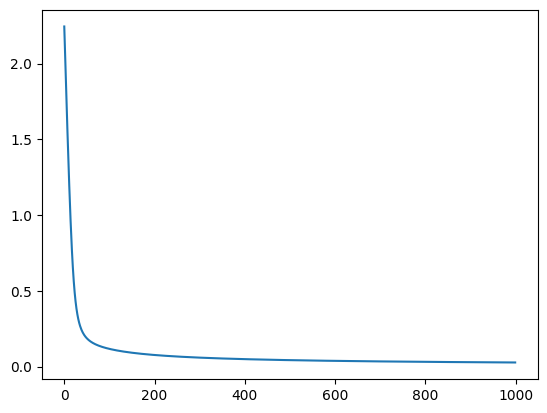

In [14]:
plt.plot(losses)

In [16]:
with torch.no_grad():
  pred = (((perceptron(X, W, b)) > 0.5).int()).reshape(-1)
  print(sum(pred == y))

tensor(40)


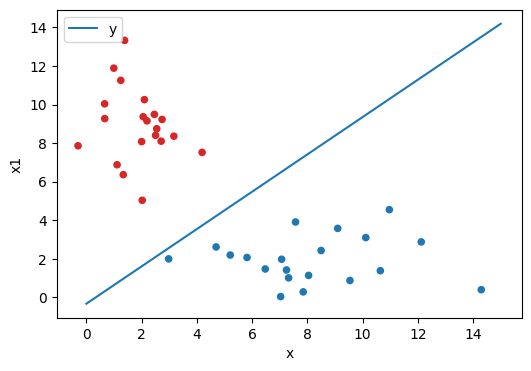

In [18]:
# Plot points and line
fig, ax = plt.subplots(figsize=(6, 4))
df.plot(kind='scatter',y='x1',x='x2',c=df['r'].map({1:'tab:blue',0:'tab:red'}), ax=ax)

x_r = [0,15]
y_r = []
for x in x_r:
    y_r.append(x*float((-(W[0])/(W[1])))+ float((-b/(W[1]))))
y_r

pd.DataFrame(list(zip(y_r,x_r)), columns=['y','x']).plot(kind='line', y='y', x='x', ax=ax)
buf = io.BytesIO()
fig.savefig(buf, format="jpg")
buf.seek(0)
frames.append(PIL.Image.open(buf))